In [ ]:
import os
import json
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import itertools


# Анализ датасетов

In [282]:
results = {}
best_configs = {}
artifacts_dir = "artifacts"
labels_dir = "artifacts/labels"
figures_dir = "artifacts/figures"
datasets = ["S07-hw-dataset-01", "S07-hw-dataset-02", "S07-hw-dataset-03"]
RANDOM_STATE = 42
N_INIT = 10

## Анализ первого датасета

In [283]:
df1 = pd.read_csv(f"data/{datasets[0]}.csv")
df1.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [284]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [285]:
df1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [286]:
print("Пропуски:", df1.isnull().sum().sum())

Пропуски: 0


## Анализ второго датасета

In [287]:
df2 = pd.read_csv(f"data/{datasets[1]}.csv")
df2.head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [288]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [289]:
df2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [290]:
print("Пропуски:", df2.isnull().sum().sum())

Пропуски: 0


## Анализ третьего датасета

In [291]:
df3 = pd.read_csv(f"data/{datasets[2]}.csv")
df3.head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [292]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [293]:
df3.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [294]:
print("Пропуски:", df3.isnull().sum().sum())

Пропуски: 0


Вывод: во всех трех датасетах только числовые типы данных (float64 и int64). При этом ни в одном наборе нет пропусков, значит SimpleImputer не нужен. Категориальных признаков так же нет

## Масштабирование

In [295]:
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])
dfs = [df1, df2, df3]
sample_ids = []
X_list = []

for df in dfs:
    sample_ids.append(df['sample_id'].copy())
    X_list.append(df.drop(columns=['sample_id']))

X_scaled = [preprocessor.fit_transform(X) for X in X_list]

In [296]:
metrics_summary = {
    datasets[0]: {},
    datasets[1]: {},
    datasets[2]: {}
}
best_configs = {
    datasets[0]: {},
    datasets[1]: {},
    datasets[2]: {}
}

# KMeans

In [ ]:
def interpret_clusters(df_original, labels, feature_columns=None, id_col='sample_id'):
    df = df_original.copy()
    df['cluster'] = labels
    
    if feature_columns is None:
        feature_columns = [col for col in df.columns if col != id_col and col != 'cluster']
    
    df_no_noise = df[df['cluster'] != -1]
    profiles = df_no_noise.groupby('cluster')[feature_columns].mean() # Средние по кластерам
        
    return profiles


In [298]:
def safe_cluster_metrics(X, labels):
    """Считает метрики; возвращает None, если метрика неприменима."""
    unique = np.unique(labels)
    # Нужно минимум 2 кластера
    if len(unique) < 2:
        return None

    # Нельзя, чтобы все точки были в одном кластере
    if len(unique) == 1:
        return None

    # silhouette требует, чтобы все кластеры имели >1 точки (часто, но не всегда)
    # В sklearn silhouette_score может падать, если какой-то кластер пуст/особый.
    try:
        sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None

    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None

    try:
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None

    return {"silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch}

In [299]:
def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    """PCA(2D) именно для визуализации."""
    p = PCA(n_components=2, random_state=random_state)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title):
    plt.figure(figsize=(7, 5))
    plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.show()

def summarize_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist()))

In [300]:
def evaluate_k_range(X, k_values):
    X_work = X
    inertias = []
    silhouettes = []

    for k in k_values:
        model = KMeans(n_clusters=k, n_init=N_INIT, random_state=RANDOM_STATE)
        labels = model.fit_predict(X_work)

        inertias.append(model.inertia_)
        silhouettes.append(silhouette_score(X_work, labels))

    return {
        "k": np.array(list(k_values), dtype=int),
        "inertia": np.array(inertias, dtype=float),
        "silhouette": np.array(silhouettes, dtype=float),
    }

In [301]:
def plot_k_metrics(metrics, title=""):
    k = metrics["k"]
    inertia = metrics["inertia"]
    sil = metrics["silhouette"]

    plt.figure(figsize=(7, 4))
    plt.plot(k, inertia, marker="o")
    plt.title(f"{title}: Inertia vs K")
    plt.xlabel("K")
    plt.ylabel("inertia_ (ниже лучше)")
    plt.grid(True, alpha=0.25)
    plot_name = f"K_means_inertia_vs_k_{title}"
    plt.savefig(os.path.join(figures_dir, plot_name), dpi=300, bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(7, 4))
    plt.plot(k, sil, marker="o")
    plt.title(f"{title}: Silhouette vs K")
    plt.xlabel("K")
    plt.ylabel("silhouette (выше лучше)")
    plt.grid(True, alpha=0.25)
    plot_name = f"K_means_silhouette_vs_k_{title}"
    plt.savefig(os.path.join(figures_dir, plot_name), dpi=300, bbox_inches="tight")
    plt.show()

In [302]:
def plot_2d_points(X, labels=None, centers=None, title=""):
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)
    centers = pca.transform(centers)

    plt.figure(figsize=(7, 5))
    if labels is None:
        plt.scatter(X[:, 0], X[:, 1], s=25)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=25)

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=220, edgecolor="k")

    if title:
        plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True, alpha=0.25)
    plot_name = f"K_means_PCA(2D)_scatter_{title}"
    plt.savefig(os.path.join(figures_dir, plot_name), dpi=300, bbox_inches="tight")
    plt.show()

## Датасет 1

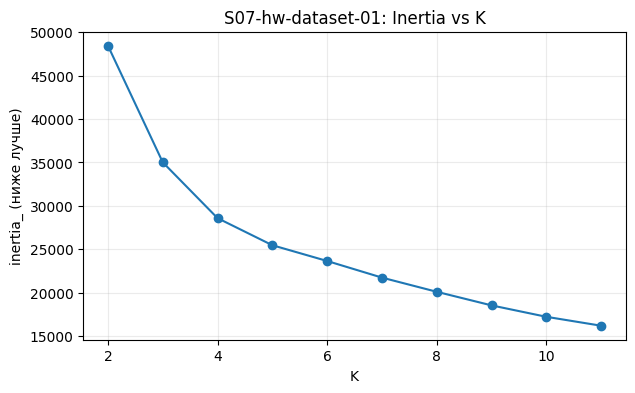

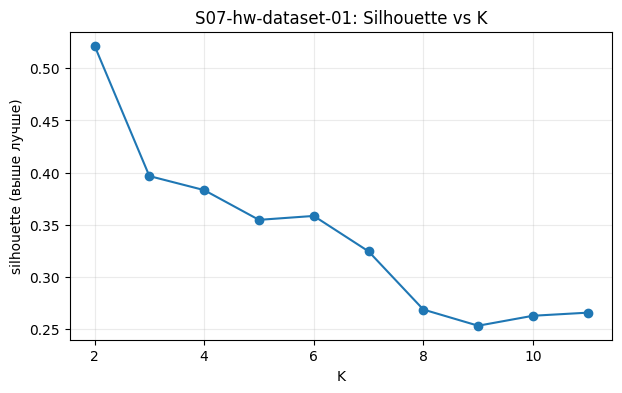

In [303]:
k_values = range(2, 12)

metrics_scaled = evaluate_k_range(X_scaled[0], k_values)
plot_k_metrics(metrics_scaled, datasets[0])


In [304]:
best_k = 2
kmeans_best = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=N_INIT)
labels_kmeans = kmeans_best.fit_predict(X_scaled[0])
k_means_metrics = safe_cluster_metrics(X_scaled[0], labels_kmeans)
metrics_summary[datasets[0]]['k_means'] = k_means_metrics
best_configs[datasets[0]].setdefault('k_means', {})['k'] = best_k
best_configs[datasets[0]].setdefault('k_means', {})['criterion'] = "Better silhouette"
print(metrics_summary)
print(best_configs)

{'S07-hw-dataset-01': {'k_means': {'silhouette': 0.5216395622404242, 'davies_bouldin': 0.6853295219054457, 'calinski_harabasz': 11786.954622671532}}, 'S07-hw-dataset-02': {}, 'S07-hw-dataset-03': {}}
{'S07-hw-dataset-01': {'k_means': {'k': 2, 'criterion': 'Better silhouette'}}, 'S07-hw-dataset-02': {}, 'S07-hw-dataset-03': {}}


Интерпретация кластеров

In [305]:
interpret_clusters(df1, labels_kmeans)

,f01,f02,f03,f04,f05,f06,f07,f08
cluster,,,,,,,,
0,17.540764,60.096197,-1.196370,-102.674372,10.074911,29.255953,-0.568951,-0.008659
1,-7.416086,8.860706,0.021514,15.312967,-2.757124,-6.110273,0.184392,0.011712


Как понимать результат: два кластера, для каждого указаны средние значения по каждому признаку

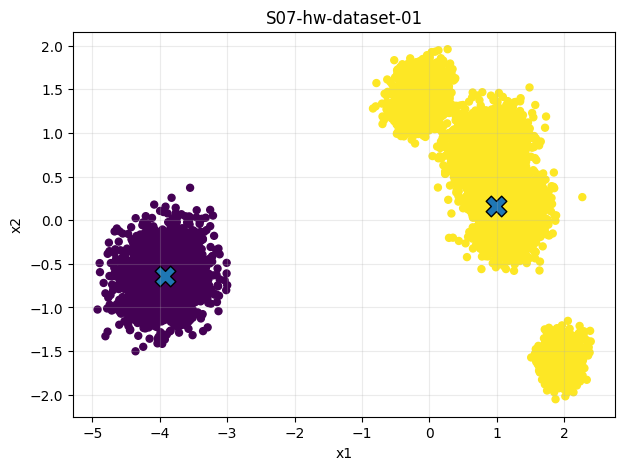

In [306]:
plot_2d_points(X_scaled[0], labels=labels_kmeans, centers=kmeans_best.cluster_centers_, title=datasets[0])

## Датасет 2

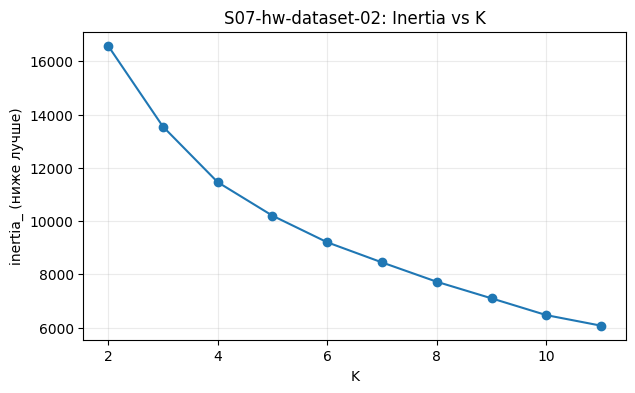

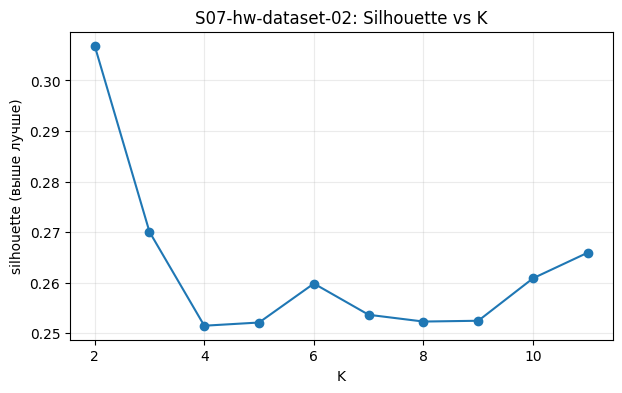

In [307]:
k_values = range(2, 12)

metrics_scaled = evaluate_k_range(X_scaled[1], k_values)
plot_k_metrics(metrics_scaled, datasets[1])

In [308]:
best_k = 2
kmeans_best = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=N_INIT)
labels_kmeans = kmeans_best.fit_predict(X_scaled[1])
k_means_metrics = safe_cluster_metrics(X_scaled[1], labels_kmeans)
metrics_summary[datasets[1]]['k_means'] = k_means_metrics
best_configs[datasets[1]].setdefault('k_means', {})['k'] = best_k
best_configs[datasets[1]].setdefault('k_means', {})['criterion'] = "Better silhouette"


In [309]:
interpret_clusters(df2, labels_kmeans)

,x1,x2,z_noise
cluster,,,
0,1.132019,-0.204094,0.227202
1,-0.179860,0.690119,-0.007291


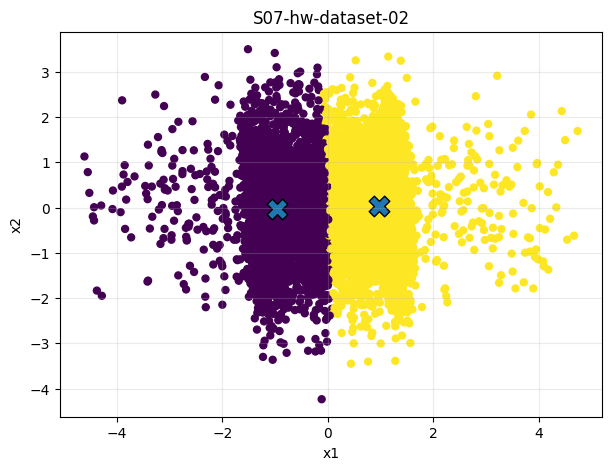

In [310]:
plot_2d_points(X_scaled[1], labels=labels_kmeans, centers=kmeans_best.cluster_centers_, title=datasets[1])

## Датасет 3

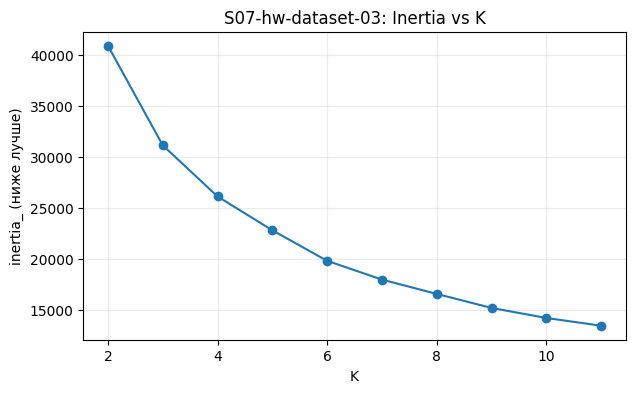

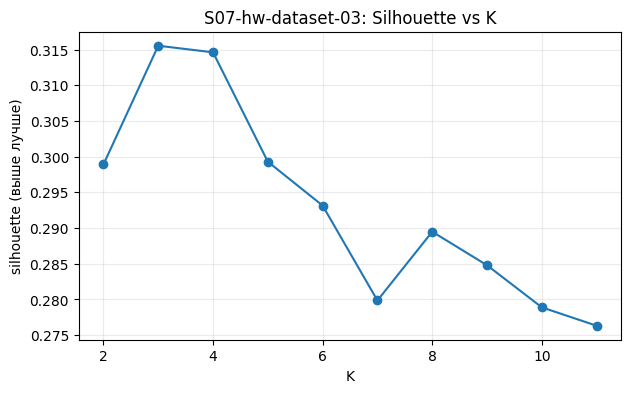

In [311]:
k_values = range(2, 12)

metrics_scaled = evaluate_k_range(X_scaled[2], k_values)
plot_k_metrics(metrics_scaled, datasets[2])

In [312]:
best_k = 3
kmeans_best = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=N_INIT)
labels_kmeans = kmeans_best.fit_predict(X_scaled[2])
k_means_metrics = safe_cluster_metrics(X_scaled[2], labels_kmeans)
metrics_summary[datasets[2]]['k_means'] = k_means_metrics
best_configs[datasets[2]].setdefault('k_means', {})['k'] = best_k
best_configs[datasets[2]].setdefault('k_means', {})['criterion'] = "Better silhouette"


In [313]:
interpret_clusters(df3, labels_kmeans)

,x1,x2,f_corr,f_noise
cluster,,,,
0,-2.864448,1.780900,-1.195789,-0.016116
1,2.610427,-3.584087,1.338032,-0.006847
2,6.596926,5.883479,1.169742,-0.073104


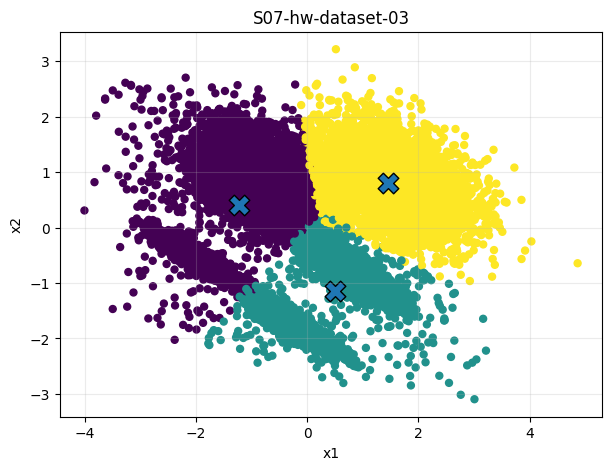

In [314]:
plot_2d_points(X_scaled[2], labels=labels_kmeans, centers=kmeans_best.cluster_centers_, title=datasets[2])

In [315]:
metrics_summary

{'S07-hw-dataset-01': {'k_means': {'silhouette': 0.5216395622404242,
   'davies_bouldin': 0.6853295219054457,
   'calinski_harabasz': 11786.954622671532}},
 'S07-hw-dataset-02': {'k_means': {'silhouette': 0.3068610017701601,
   'davies_bouldin': 1.3234721699867644,
   'calinski_harabasz': 3573.3933329348392}},
 'S07-hw-dataset-03': {'k_means': {'silhouette': 0.3155447003782518,
   'davies_bouldin': 1.1577256320598661,
   'calinski_harabasz': 6957.162639510167}}}

In [316]:
best_configs

{'S07-hw-dataset-01': {'k_means': {'k': 2, 'criterion': 'Better silhouette'}},
 'S07-hw-dataset-02': {'k_means': {'k': 2, 'criterion': 'Better silhouette'}},
 'S07-hw-dataset-03': {'k_means': {'k': 3, 'criterion': 'Better silhouette'}}}

# DBSCAN

In [317]:
def plot_dbscan(X, labels, title="", filename="", ax=None, show_legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))

    labels = np.asarray(labels)
    unique = sorted(set(labels))

    for lab in unique:
        mask = labels == lab
        if lab == -1:
            ax.scatter(X[mask, 0], X[mask, 1], s=20, marker="x", label="noise (-1)")
        else:
            ax.scatter(X[mask, 0], X[mask, 1], s=20, label=f"cluster {lab}")

    ax.set_title(title, fontsize=10)
    ax.set_xlabel("x1", fontsize=9)
    ax.set_ylabel("x2", fontsize=9)
    ax.grid(True, alpha=0.25)

    if filename != "":
        plot_name = f"dbscan_PCA(2D)_scatter_{filename}"
        plt.savefig(os.path.join(figures_dir, plot_name), dpi=300, bbox_inches="tight")

    if show_legend:
        legend = ax.legend(loc='upper right', fontsize=7, frameon=False, ncol=1)
        legend.get_frame().set_alpha(0.8)

    return ax

In [318]:
def plot_eps_min_samples_metrics(df_results, title=""):
    plt.figure(figsize=(8, 5))
    for ms in sorted(df_results['min_samples'].unique()):
        subset = df_results[df_results['min_samples'] == ms]
        plt.plot(subset['eps'], subset['silhouette'], marker='o', label=f'min_samples={ms}')

    plt.xlabel('eps')
    plt.ylabel('Silhouette Score')
    plt.title(f'{title}: Silhouette vs eps')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plot_name = f"dbscan_silhouette_vs_eps_{title}"
    plt.savefig(os.path.join(figures_dir, plot_name), dpi=300, bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(8, 5))
    for eps in sorted(df_results['eps'].unique()):
        subset = df_results[df_results['eps'] == eps]
        plt.plot(subset['min_samples'], subset['silhouette'], marker='o', label=f'eps={eps}')

    plt.xlabel('min_samples')
    plt.ylabel('Silhouette Score')
    plt.title(f'{title}: Silhouette vs min_samples')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plot_name = f"dbscan_silhouette_vs_min_samples_{title}"
    plt.savefig(os.path.join(figures_dir, plot_name), dpi=300, bbox_inches="tight")
    plt.show()

In [319]:
def safe_internal_metrics(X, labels):
    """Внутренние метрики для кластеров.

    Важно:
    - silhouette корректно считать, когда есть >=2 кластера.
    - шум (-1) лучше исключать из расчёта, иначе метрика становится трудно интерпретируемой.
    """
    labels = np.asarray(labels)
    mask = labels != -1
    X2 = X[mask]
    y2 = labels[mask]

    result = {}

    # если осталось меньше 2 кластеров – метрики бессмысленны
    if len(set(y2)) < 2:
        result["silhouette"] = None
        result["calinski_harabasz"] = None
        result["davies_bouldin"] = None
        return result

    result["silhouette"] = float(silhouette_score(X2, y2))
    result["davies_bouldin"] = float(davies_bouldin_score(X2, y2))
    result["calinski_harabasz"] = float(calinski_harabasz_score(X2, y2))
    return result

## Датасет 1

C:\Users\vlada\AppData\Local\Temp\ipykernel_4388\2023491715.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


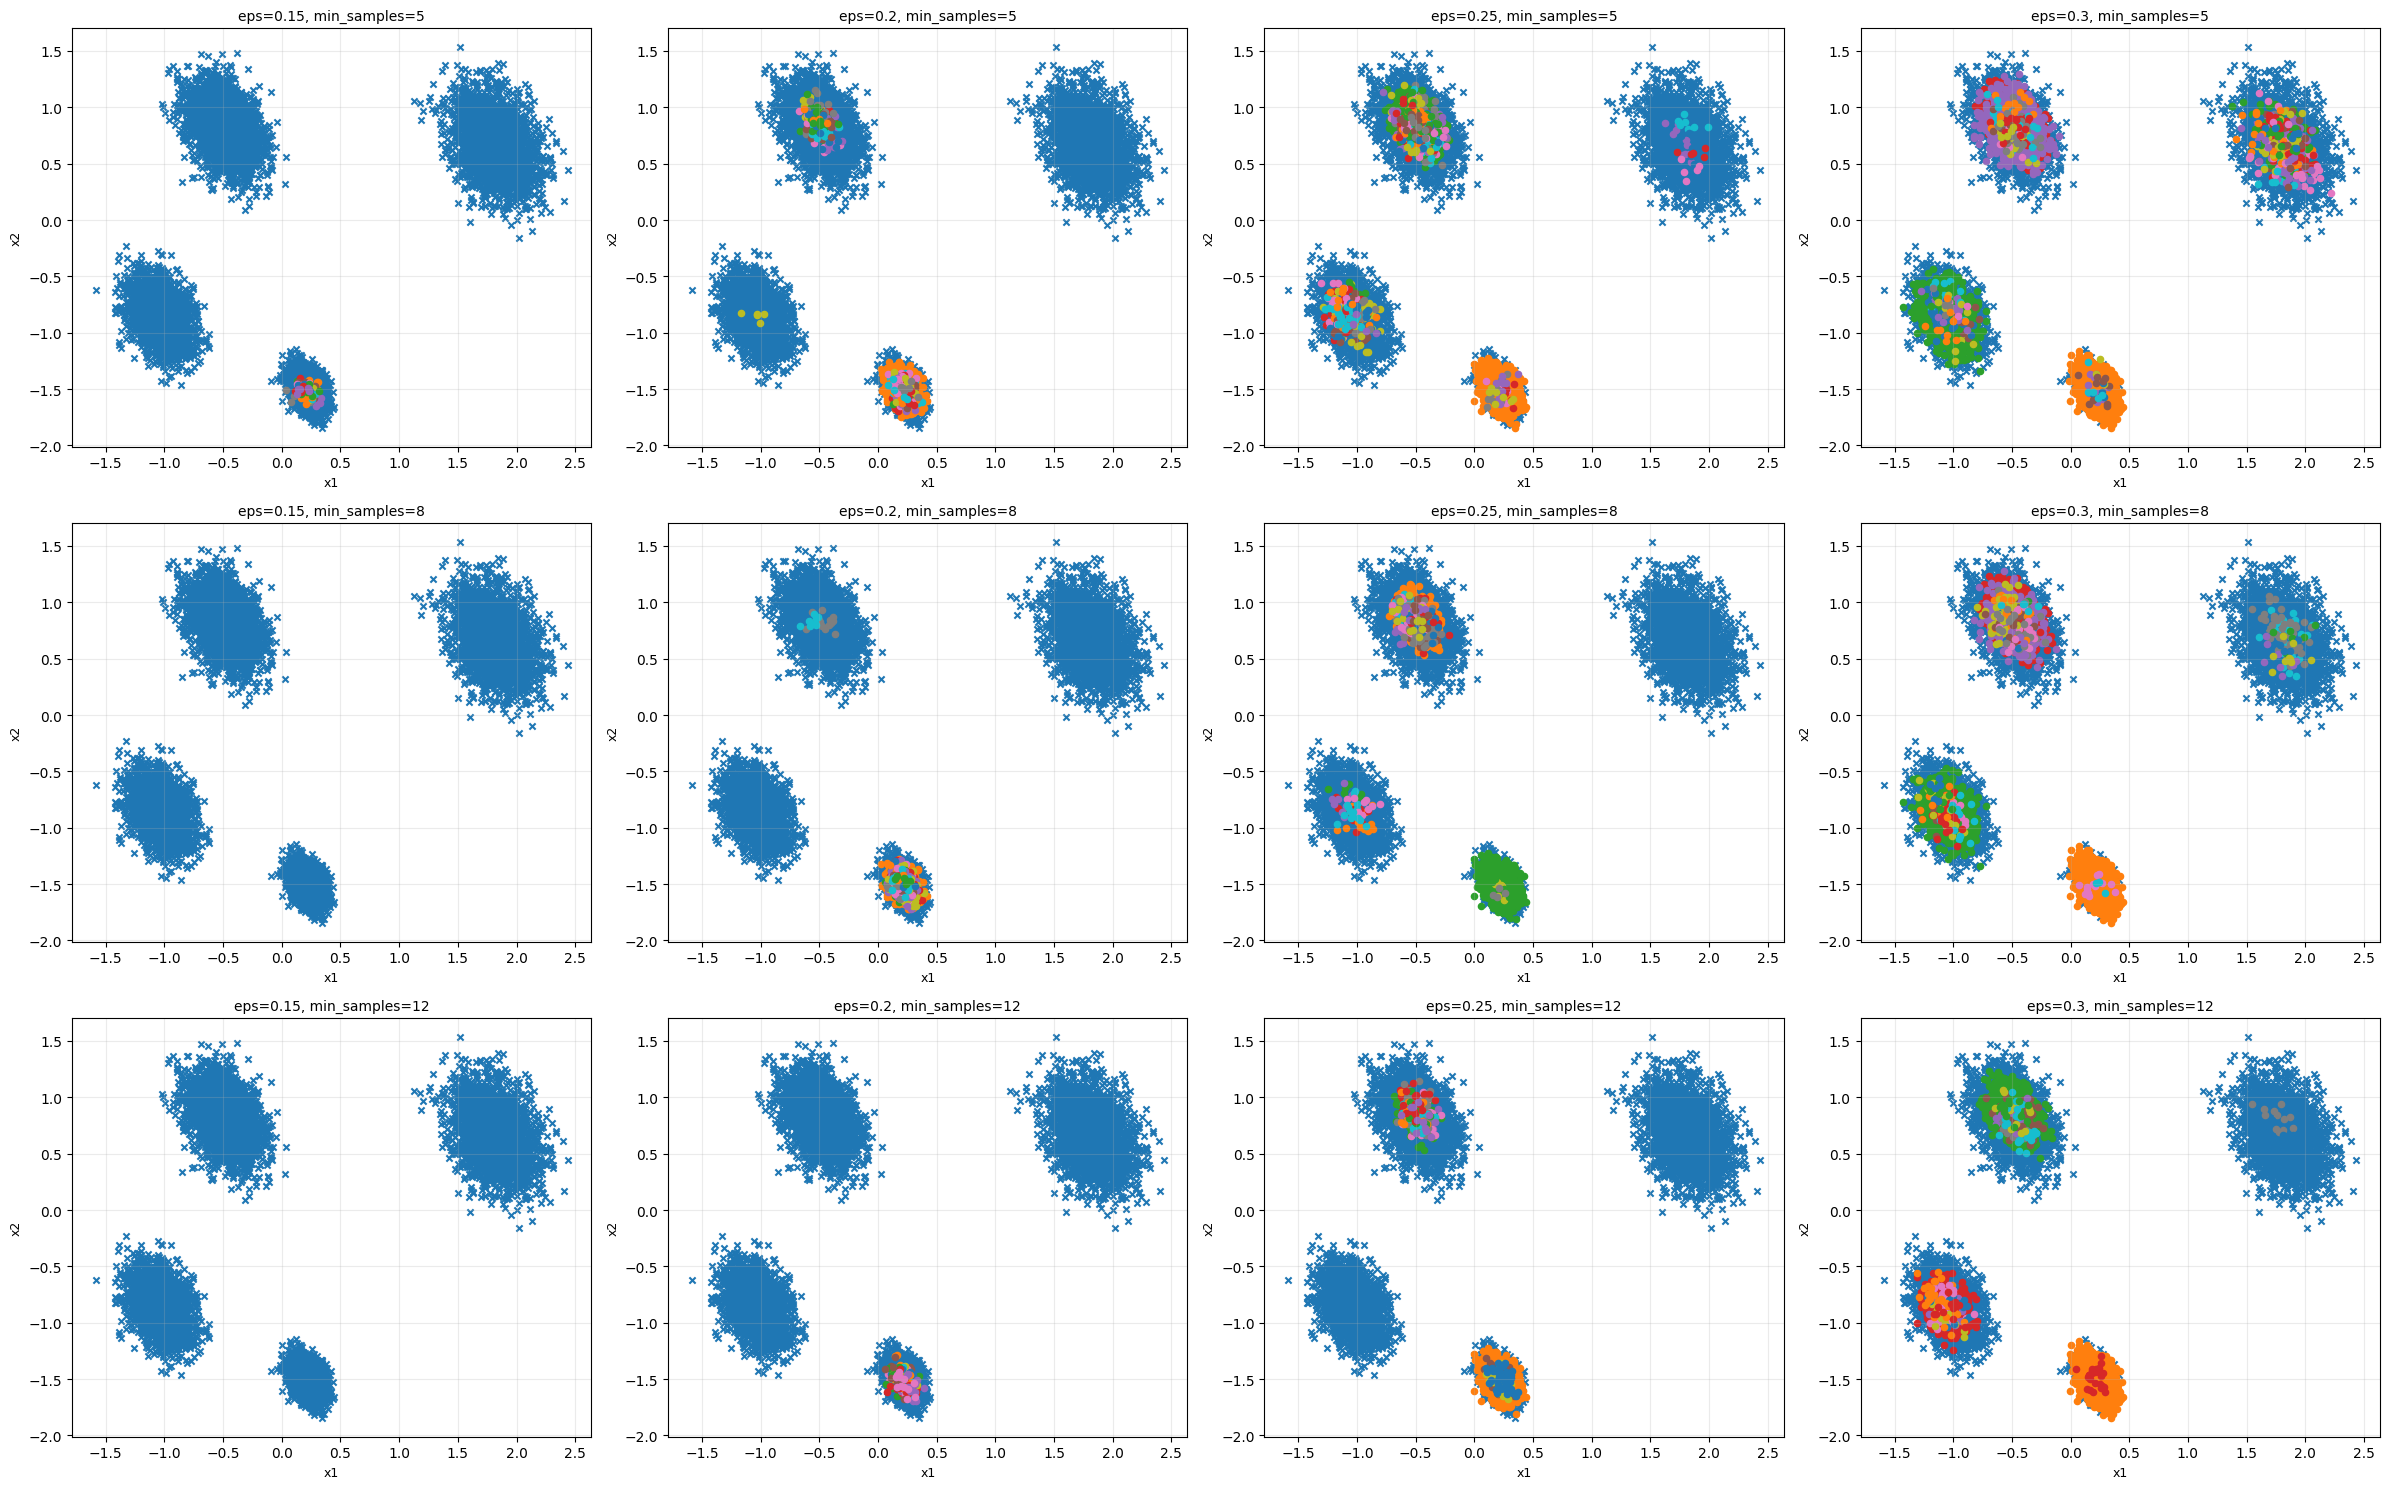

In [320]:
eps_list = [0.15, 0.20, 0.25, 0.30]
min_samples_list = [5, 8, 12]

results = [] 
fig, axes = plt.subplots(len(min_samples_list), len(eps_list), figsize=(6 * len(eps_list), 5 * len(min_samples_list)), constrained_layout=True)
for i, min_samples in enumerate(min_samples_list):
    for j, eps in enumerate(eps_list):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled[0])
        sil = safe_internal_metrics(X_scaled[0], labels)['silhouette']
        ax = axes[i, j]
        plot_dbscan(X_scaled[0], labels, title=f"eps={eps}, min_samples={min_samples}", ax=ax)
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'silhouette': sil
        })

plt.tight_layout()
plt.show()


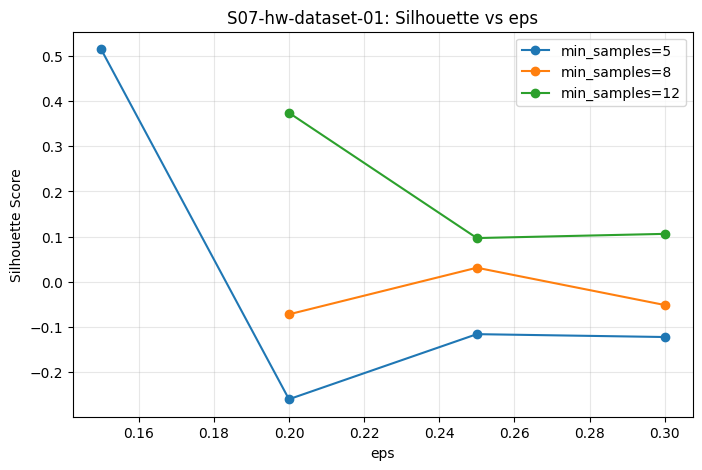

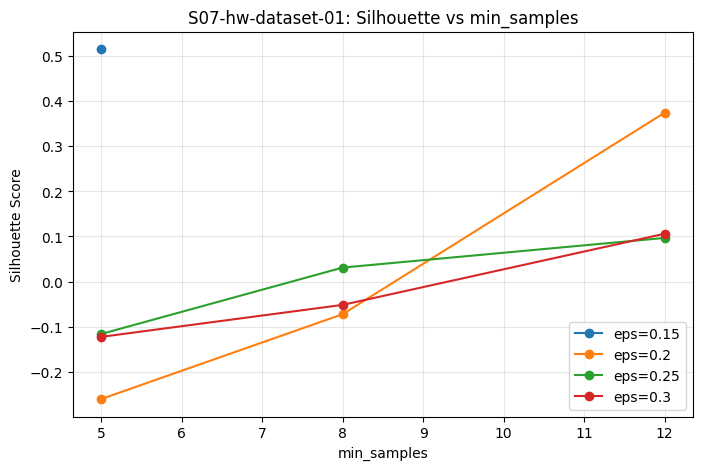

In [321]:
df_results = pd.DataFrame(results)
plot_eps_min_samples_metrics(df_results, datasets[0])

In [322]:
best_eps = 0.3
best_min_samples = 12
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan_best.fit_predict(X_scaled[0])
dbscan_metrics = safe_internal_metrics(X_scaled[0], labels_dbscan)
metrics_summary[datasets[0]]['dbscan'] = dbscan_metrics
best_configs[datasets[0]].setdefault('dbscan', {})['eps'] = best_eps
best_configs[datasets[0]].setdefault('dbscan', {})['min_samples'] = best_min_samples
n_noise = np.sum(labels == -1)
n_points = len(labels)
noise_share = float(n_noise / n_points)
best_configs[datasets[0]].setdefault('dbscan', {})['noise_share'] = noise_share
best_configs[datasets[0]].setdefault('dbscan', {})['criterion'] = "Best silhouette + one of the best clustering visually, moderate noise level"

In [323]:
interpret_clusters(df1, labels_dbscan)

,f01,f02,f03,f04,f05,f06,f07,f08
cluster,,,,,,,,
0,-0.064306,-72.217996,-0.042558,65.510575,-10.445304,-8.922633,-0.223402,-0.012274
1,-7.826056,71.114610,-0.008993,-45.345702,3.510375,-7.319389,-1.492508,0.022065
2,-13.981123,-33.540534,0.191292,22.243760,0.397996,0.307299,-2.067510,-0.024667
3,-13.996178,-34.531229,0.177885,23.081466,0.187128,0.309775,-64.822467,0.416905
4,-7.484366,68.897113,-0.077521,17.326831,-4.251135,-8.156089,-7.355137,-0.091972
5,-14.283079,-37.635434,0.201917,24.737957,0.010667,0.693885,49.213735,-0.020933
6,-7.636327,61.908235,-0.045540,22.954958,-4.961853,-8.858795,-0.055932,0.595231
7,-13.948801,-38.546614,0.201914,20.734117,0.776733,1.723696,-58.006347,-0.303105
8,-6.964865,59.335160,-0.082743,17.365671,-4.184547,-5.899475,23.661872,-0.162073


In [324]:
print(f"Доля шума в датасете {datasets[0]}: {noise_share}")

Доля шума в датасете S07-hw-dataset-01: 0.66925


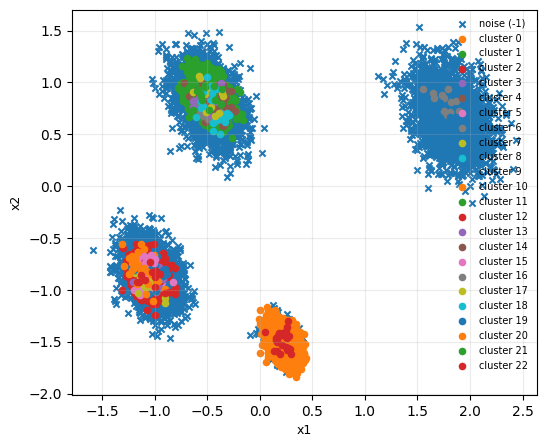

In [325]:
plot_dbscan(X_scaled[0], labels_dbscan, show_legend=True, filename=datasets[0])
plt.show()

## Датасет 2

C:\Users\vlada\AppData\Local\Temp\ipykernel_4388\4246837504.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


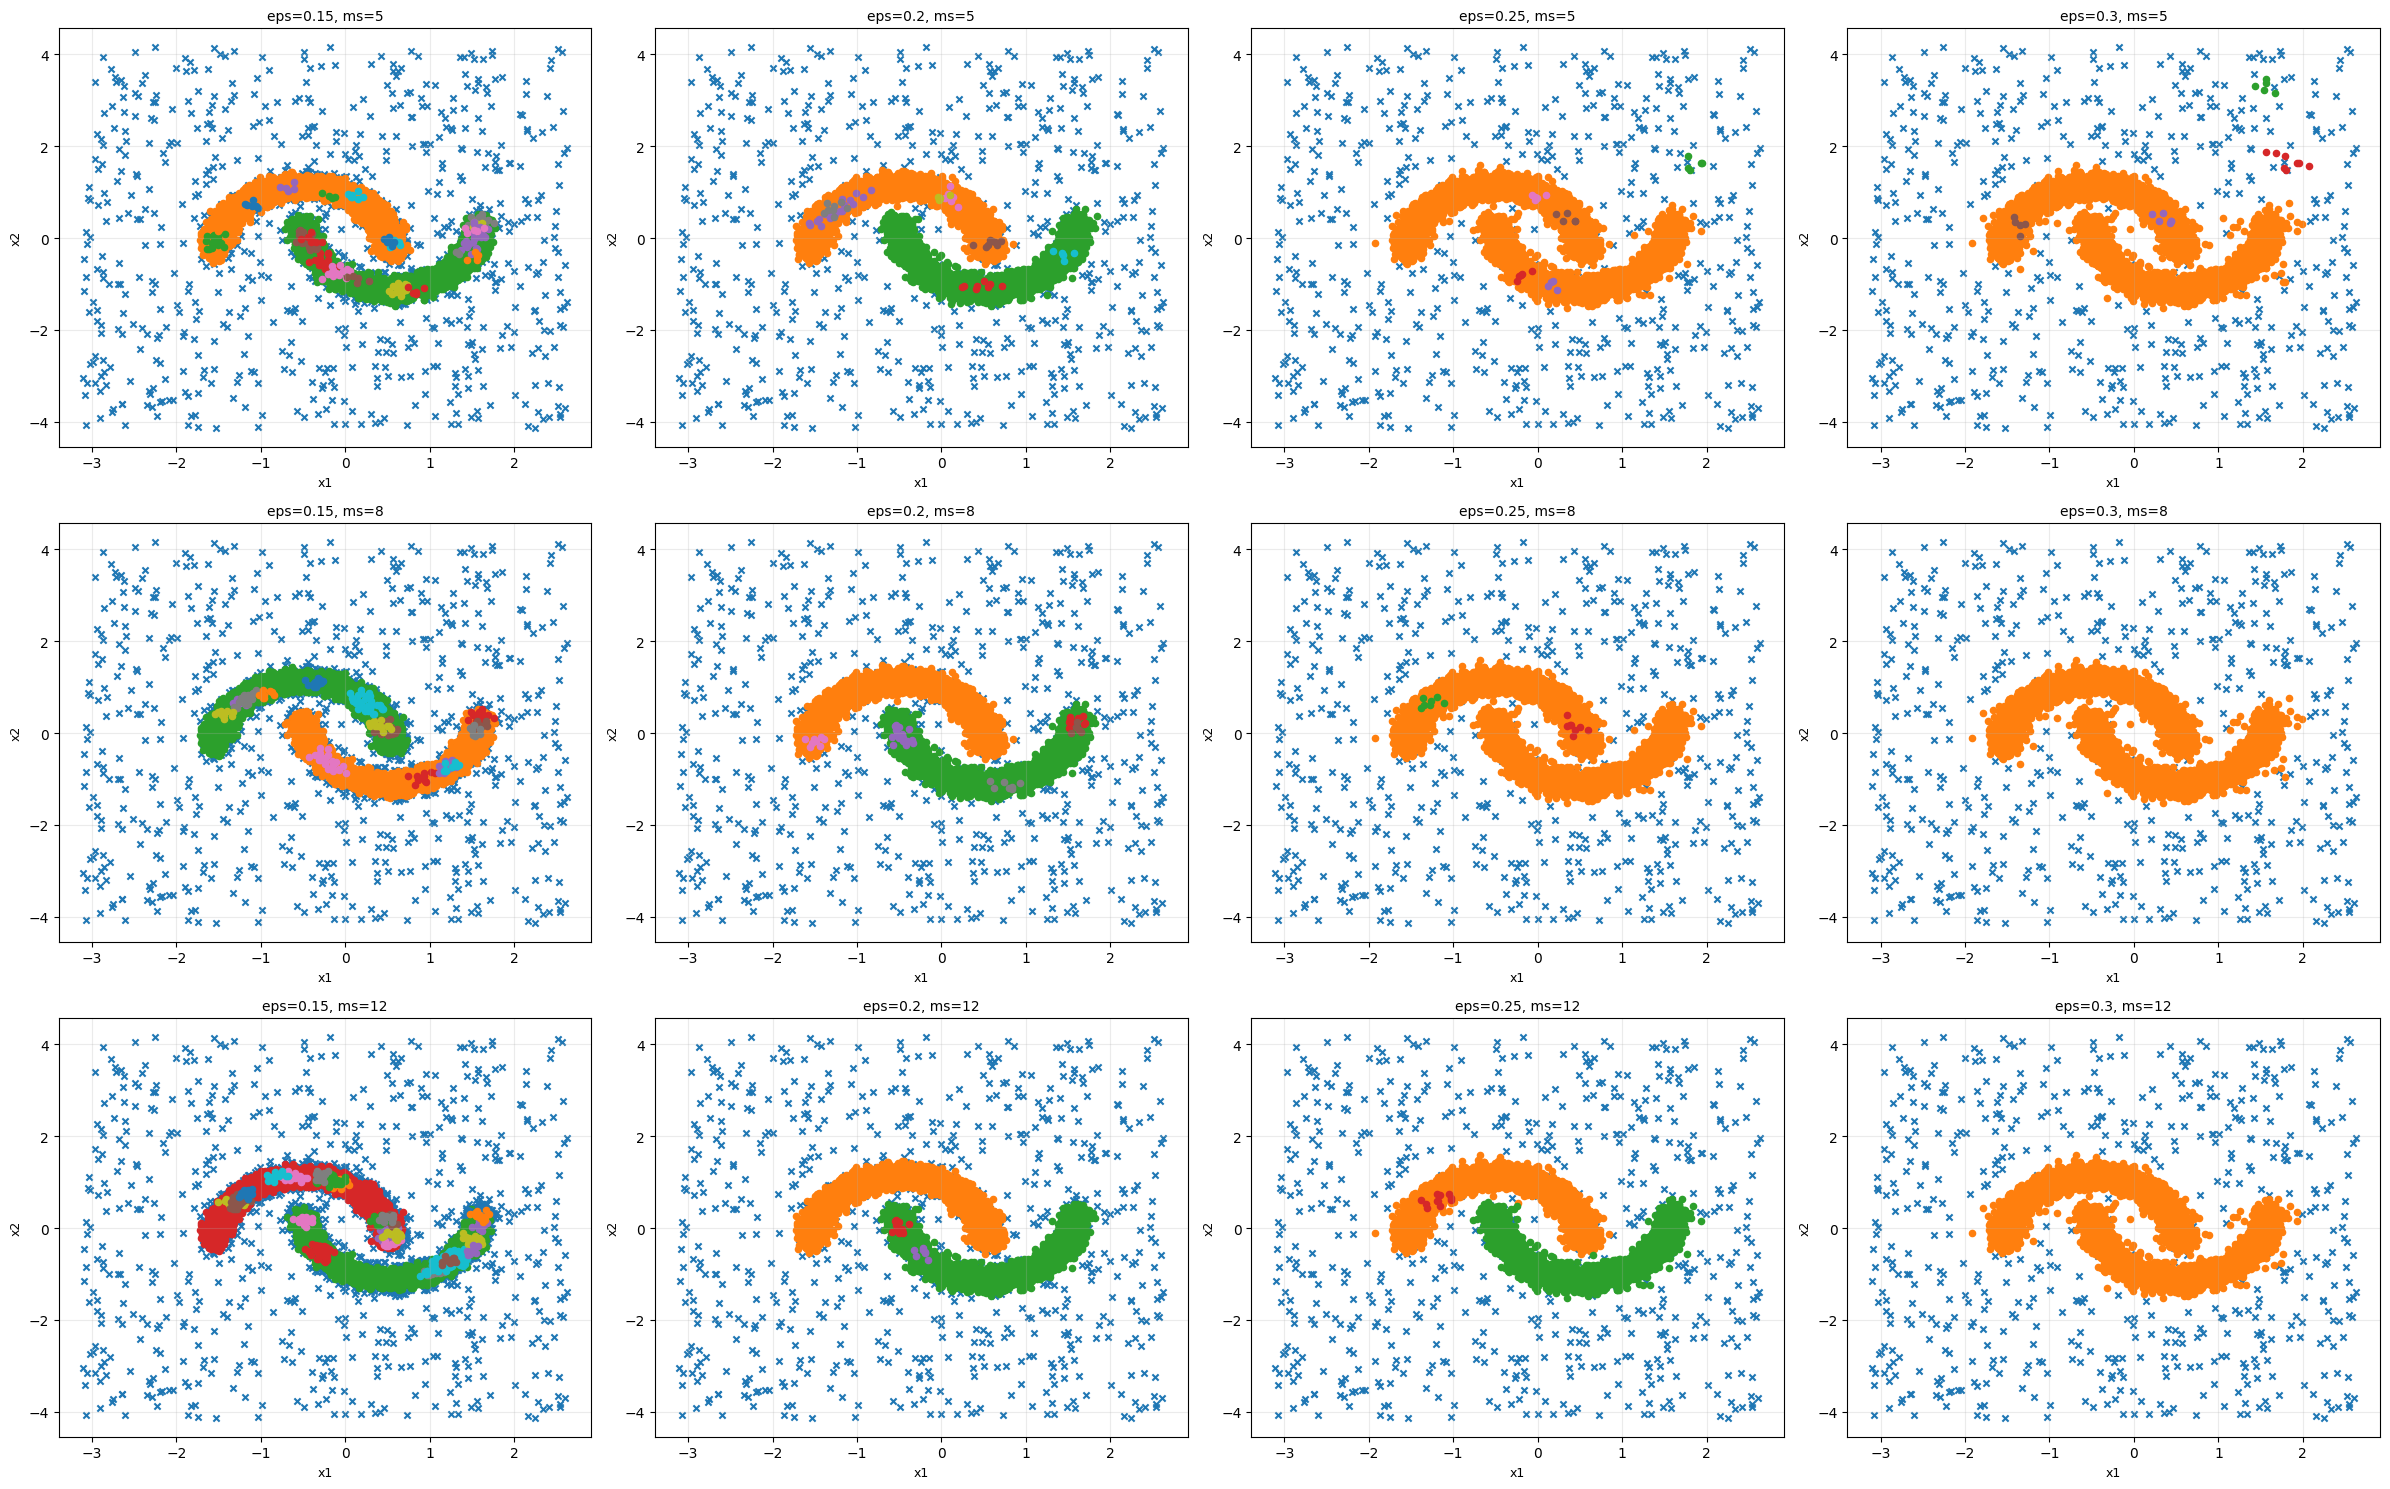

In [326]:
eps_list = [0.15, 0.20, 0.25, 0.30]
min_samples_list = [5, 8, 12]

results = [] 
fig, axes = plt.subplots(len(min_samples_list), len(eps_list), figsize=(6 * len(eps_list), 5 * len(min_samples_list)), constrained_layout=True)
for i, ms in enumerate(min_samples_list):
    for j, eps in enumerate(eps_list):
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled[1])
        sil = safe_internal_metrics(X_scaled[1], labels)['silhouette']
        ax = axes[i, j]
        plot_dbscan(X_scaled[1], labels, title=f"eps={eps}, ms={ms}", ax=ax)
        results.append({
            'eps': eps,
            'min_samples': ms,
            'silhouette': sil
        })

plt.tight_layout()
plt.show()

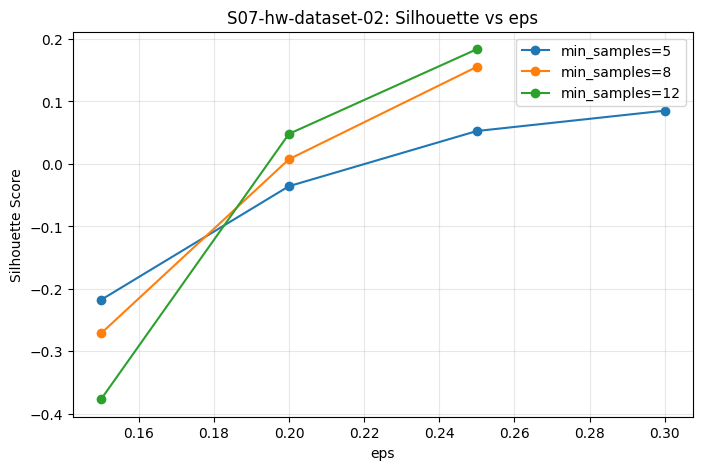

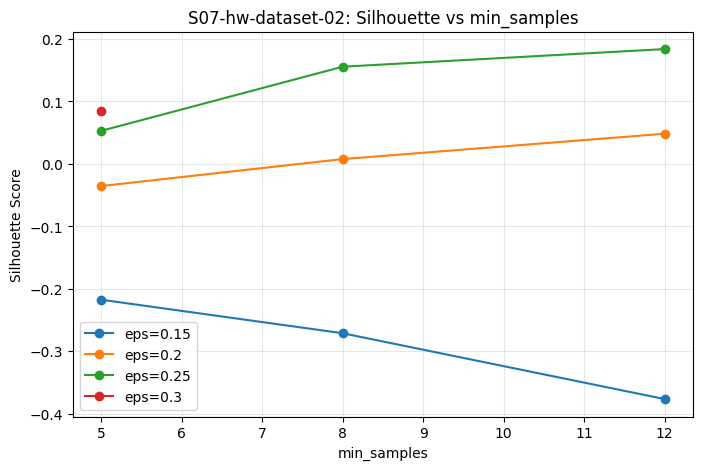

In [327]:
df_results = pd.DataFrame(results)
plot_eps_min_samples_metrics(df_results, datasets[1])

In [328]:
best_eps = 0.25
best_min_samples = 12
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan_best.fit_predict(X_scaled[1])
dbscan_metrics = safe_internal_metrics(X_scaled[1], labels_dbscan)
metrics_summary[datasets[1]]['dbscan'] = dbscan_metrics
best_configs[datasets[1]].setdefault('dbscan', {})['eps'] = best_eps
best_configs[datasets[1]].setdefault('dbscan', {})['min_samples'] = best_min_samples
n_noise = np.sum(labels == -1)
n_points = len(labels)
noise_share = float(n_noise / n_points)
best_configs[datasets[1]].setdefault('dbscan', {})['noise_share'] = noise_share
best_configs[datasets[1]].setdefault('dbscan', {})['criterion'] = "High silhouette + good visual clustering (2 clear arcs), moderate noise"

In [329]:
interpret_clusters(df2, labels_dbscan)

,x1,x2,z_noise
cluster,,,
0,-0.008808,0.638636,0.017283
1,0.997474,-0.141540,-0.062534
2,-0.650046,0.644238,17.155526


In [330]:
print(f"Доля шума в датасете {datasets[1]}: {noise_share}")

Доля шума в датасете S07-hw-dataset-02: 0.089875


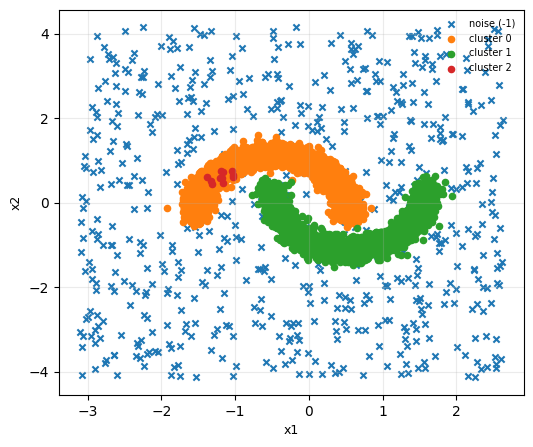

In [331]:
plot_dbscan(X_scaled[1], labels_dbscan, show_legend=True, filename=datasets[1])
plt.show()

## Датасет 3

C:\Users\vlada\AppData\Local\Temp\ipykernel_4388\3808584450.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


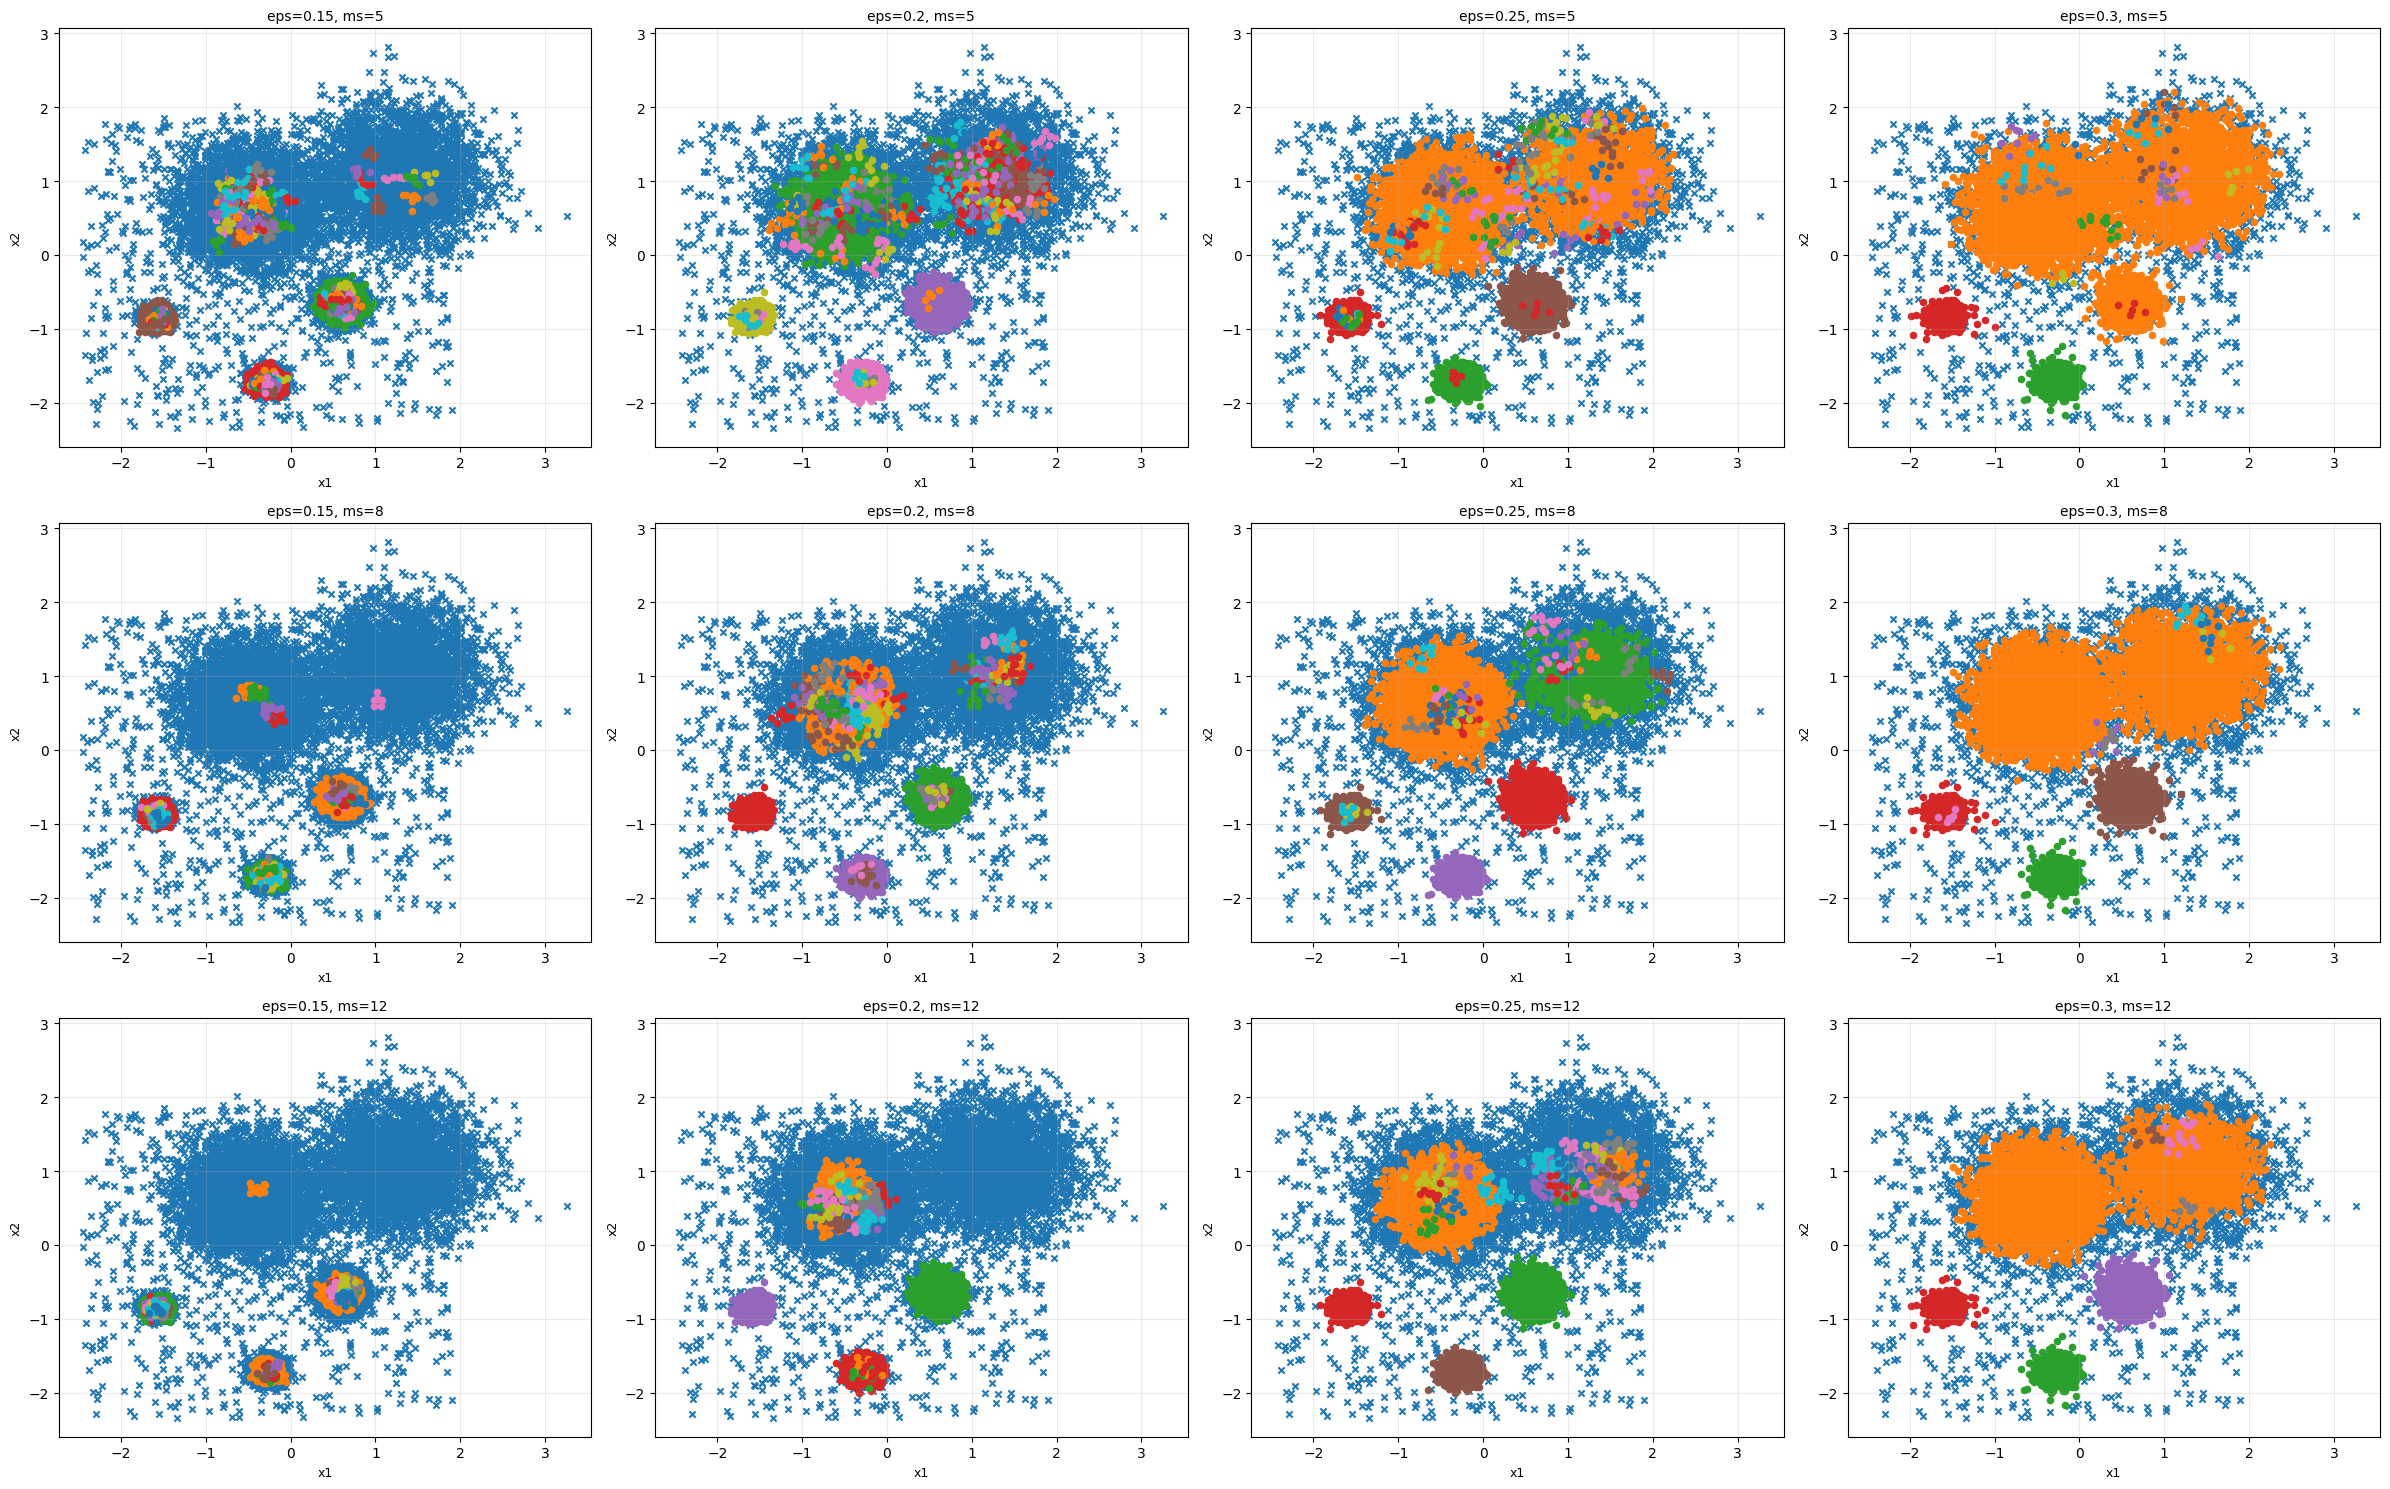

In [332]:
eps_list = [0.15, 0.20, 0.25, 0.30]
min_samples_list = [5, 8, 12]

results = [] 
fig, axes = plt.subplots(len(min_samples_list), len(eps_list), figsize=(6 * len(eps_list), 5 * len(min_samples_list)), constrained_layout=True)
for i, ms in enumerate(min_samples_list):
    for j, eps in enumerate(eps_list):
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled[2])
        sil = safe_internal_metrics(X_scaled[2], labels)['silhouette']
        ax = axes[i, j]
        plot_dbscan(X_scaled[2], labels, title=f"eps={eps}, ms={ms}", ax=ax)
        results.append({
            'eps': eps,
            'min_samples': ms,
            'silhouette': sil
        })

plt.tight_layout()
plt.show()

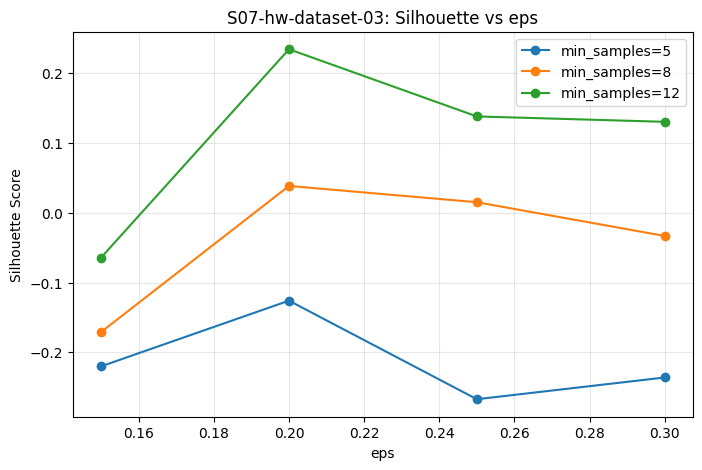

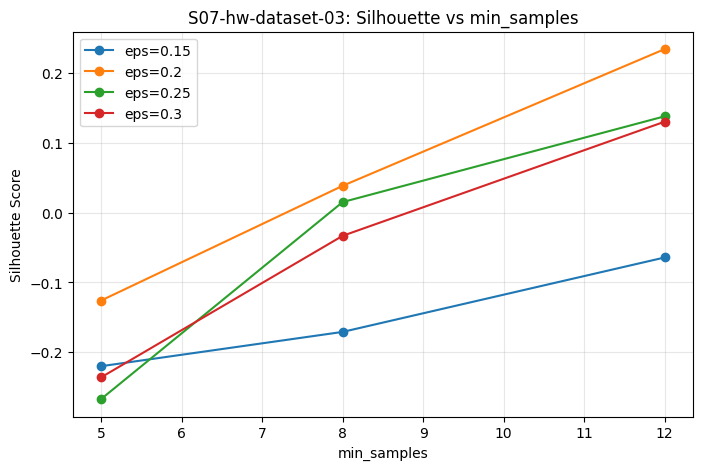

In [333]:
df_results = pd.DataFrame(results)
plot_eps_min_samples_metrics(df_results, datasets[2])

In [334]:
best_eps = 0.3
best_min_samples = 12
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan_best.fit_predict(X_scaled[2])
dbscan_metrics = safe_internal_metrics(X_scaled[2], labels_dbscan)
metrics_summary[datasets[2]]['dbscan'] = dbscan_metrics
best_configs[datasets[2]].setdefault('dbscan', {})['eps'] = best_eps
best_configs[datasets[2]].setdefault('dbscan', {})['min_samples'] = best_min_samples
n_noise = np.sum(labels == -1)
n_points = len(labels)
noise_share = float(n_noise / n_points)
best_configs[datasets[2]].setdefault('dbscan', {})['noise_share'] = noise_share
best_configs[datasets[2]].setdefault('dbscan', {})['criterion'] = "Better silhouette + good clustering visually, moderate noise"

In [335]:
interpret_clusters(df3, labels_dbscan)

,x1,x2,f_corr,f_noise
cluster,,,,
0,1.660988,4.590813,-0.192644,-0.017346
1,-0.010338,-6.990306,0.997983,-0.055815
2,-5.999498,-3.003904,-1.338857,-0.037226
3,3.985462,-1.992822,1.473541,0.007384
4,5.005784,7.928381,-0.343942,-1.016549
5,6.721546,7.912051,0.482806,-3.686409
6,7.233236,3.447419,1.991250,3.134139


In [336]:
print(f"Доля шума в датасете {datasets[2]}: {noise_share}")

Доля шума в датасете S07-hw-dataset-03: 0.24813333333333334


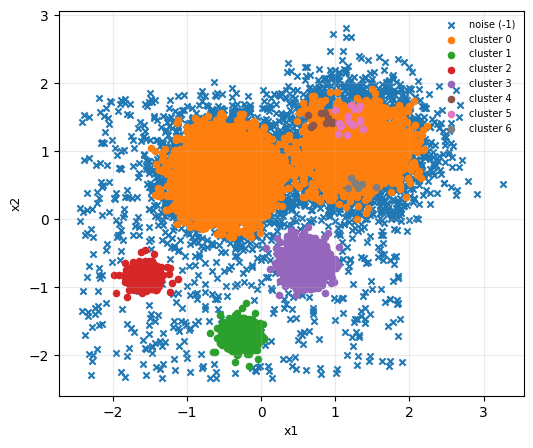

In [337]:
plot_dbscan(X_scaled[2], labels_dbscan, show_legend=True, filename=datasets[2])
plt.show()

# Устойчивость

In [ ]:
seeds = [1,2,3,4,5]

results = {
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

all_labels = []
for seed in seeds:
    best_k = best_configs[datasets[0]]['k_means']['k']
    kmeans_test = KMeans(n_clusters=best_k, random_state=seed, n_init=N_INIT)
    labels_kmeans = kmeans_best.fit_predict(X_scaled[0])
    k_means_metrics = safe_cluster_metrics(X_scaled[0], labels_kmeans)
    all_labels.append(labels_kmeans)
    
    results['silhouette'].append(k_means_metrics['silhouette'])
    results['davies_bouldin'].append(k_means_metrics['davies_bouldin'])
    results['calinski_harabasz'].append(k_means_metrics['calinski_harabasz'])
    
ari_scores = []
for i, j in itertools.combinations(range(len(all_labels)), 2):
    ari = adjusted_rand_score(all_labels[i], all_labels[j])
    ari_scores.append(ari)

print(f"silhouette:  {np.mean(results['silhouette'])} +- {np.std(results['silhouette'])}")
print(f"davies_bouldin: {np.mean(results['davies_bouldin'])} +- {np.std(results['davies_bouldin'])}")
print(f"calinski_harabasz: {np.mean(results['calinski_harabasz'])} +- {np.std(results['calinski_harabasz'])}")
print(f"ARI (оценка похожести разбиений): {np.mean(ari_scores)} +- {np.std(ari_scores)}")

silhouette:  0.3967578520894987 +- 0.0
davies_bouldin: 0.9646042500366256 +- 0.0
calinski_harabasz: 10446.638111140075 +- 0.0
ARI (оценка похожести разбиений): 1.0 +- 0.0


ARI = 1.0 => все запуски дают одинаковые разбиения, K-Means стабилен

# Итог по каждому датасету 

In [339]:
with open(f'{artifacts_dir}/metrics_summary.json', 'w') as f:
    json.dump(metrics_summary, f, indent=4)

with open(f'{artifacts_dir}/best_configs.json', 'w') as f:
    json.dump(best_configs, f, indent=4, default=str)

## Датасет 1

In [340]:
metrics_summary[datasets[0]]

{'k_means': {'silhouette': 0.5216395622404242,
  'davies_bouldin': 0.6853295219054457,
  'calinski_harabasz': 11786.954622671532},
 'dbscan': {'silhouette': 0.10610195201260433,
  'davies_bouldin': 0.911447001375174,
  'calinski_harabasz': 615.9570791030344}}

In [341]:
best_configs[datasets[0]]

{'k_means': {'k': 2, 'criterion': 'Better silhouette'},
 'dbscan': {'eps': 0.3,
  'min_samples': 12,
  'noise_share': 0.66925,
  'criterion': 'Best silhouette + one of the best clustering visually, moderate noise level'}}

Для первого датасета лучшим оказался K-Means с k=2: он показал высокие метрики качества, в то время как DBSCAN дал слабый результат. Основной «подлостью» данных были сильно разные шкалы признаков (например, разница f02 и f08 с f03), что требовало обязательного масштабирования. Также наблюдались потенциальные выбросы в таких признаках, как f02 и f04 (разрыв между mean и median). DBSCAN плохо справился из-за разной плотности кластеров, характерной для таких данных, в то время как K-Means, особенно после StandardScaler, смог выделить устойчивую и интерпретируемую структуру

In [342]:
best_k = best_configs[datasets[0]]['k_means']['k']
df1_best = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=N_INIT)
labels_kmeans = kmeans_best.fit_predict(X_scaled[0])
# print(len(X_scaled[0]))
# print(len(sample_ids[0]))
# print(len(labels_kmeans))

result_df = pd.DataFrame({
    'sample_id': sample_ids[0],
    'cluster': labels_kmeans
})
result_df.to_csv(f"{labels_dir}/labels_hw07_ds1", index=False)

## Датасет 2

In [343]:
metrics_summary[datasets[1]]

{'k_means': {'silhouette': 0.3068610017701601,
  'davies_bouldin': 1.3234721699867644,
  'calinski_harabasz': 3573.3933329348392},
 'dbscan': {'silhouette': 0.18359973773403948,
  'davies_bouldin': 1.202438354859082,
  'calinski_harabasz': 1441.8434357287547}}

In [344]:
best_configs[datasets[1]]

{'k_means': {'k': 2, 'criterion': 'Better silhouette'},
 'dbscan': {'eps': 0.25,
  'min_samples': 12,
  'noise_share': 0.089875,
  'criterion': 'High silhouette + good visual clustering (2 clear arcs), moderate noise'}}

Для второго датасета лучшим оказался K-Means с k=2, несмотря на умеренное качество. Основной сложностью стал шумовой признак z_noise, имеющий значительно больший масштаб и сильные выбросы. Без предварительного масштабирования (StandardScaler) оба алгоритма фокусировались бы на z_noise, игнорируя истинную структуру в x1/x2. DBSCAN показал более низкий Silhouette и оказался чувствителен к шуму и разной плотности, в то время как K-Means, устойчивый к таким помехам после нормализации, лучше определил подходящие кластеры

In [345]:
best_k = best_configs[datasets[1]]['k_means']['k']
df1_best = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=N_INIT)
labels_kmeans = kmeans_best.fit_predict(X_scaled[1])
result_df = pd.DataFrame({
    'sample_id': sample_ids[1],
    'cluster': labels_kmeans
})
result_df.to_csv(f"{labels_dir}/labels_hw07_ds2", index=False)

## Датасет 3

In [346]:
metrics_summary[datasets[2]]

{'k_means': {'silhouette': 0.3155447003782518,
  'davies_bouldin': 1.1577256320598661,
  'calinski_harabasz': 6957.162639510167},
 'dbscan': {'silhouette': 0.130228957269187,
  'davies_bouldin': 1.138778431050121,
  'calinski_harabasz': 2115.4340249312745}}

In [347]:
best_configs[datasets[2]]

{'k_means': {'k': 3, 'criterion': 'Better silhouette'},
 'dbscan': {'eps': 0.3,
  'min_samples': 12,
  'noise_share': 0.24813333333333334,
  'criterion': 'Better silhouette + good clustering visually, moderate noise'}}

Для третьего датасета предпочтительным оказался K-Means с k=3, продемонстрировавший умеренно хорошее качество, в то время как DBSCAN показал значительно худший Silhouette. Основными «подлостями» данных стали избыточный признак f_corr, зависимый от исходных x1/x2, и шумовой признак f_noise, не несущий информации о кластерах. Совместно они снизили плотность истинных кластеров, что особенно затруднило работу DBSCAN. K-Means, в свою очередь, оказался более устойчив к таким помехам после масштабирования, успешно выделив основную кластерную структуру в данных

In [348]:
best_k = best_configs[datasets[2]]['k_means']['k']
df1_best = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=N_INIT)
labels_kmeans = kmeans_best.fit_predict(X_scaled[2])
result_df = pd.DataFrame({
    'sample_id': sample_ids[2],
    'cluster': labels_kmeans
})
result_df.to_csv(f"{labels_dir}/labels_hw07_ds3", index=False)